### 1. Import Data from Web Crawling

In [1]:
!jupyter trust DataAnalysis.ipynb

Notebook already signed: DataAnalysis.ipynb


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import stylecloud
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
from pyecharts import *
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.render import make_snapshot
from snapshot_pyppeteer import snapshot
from pyecharts.globals import CurrentConfig, NotebookType
import nest_asyncio

In [12]:
sns.set(color_codes=True)
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams['font.family'] = "serif"
sns.set_style("darkgrid")
nest_asyncio.apply()
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
ThemeType.WALDEN

'walden'

## HKTVMall Scatter

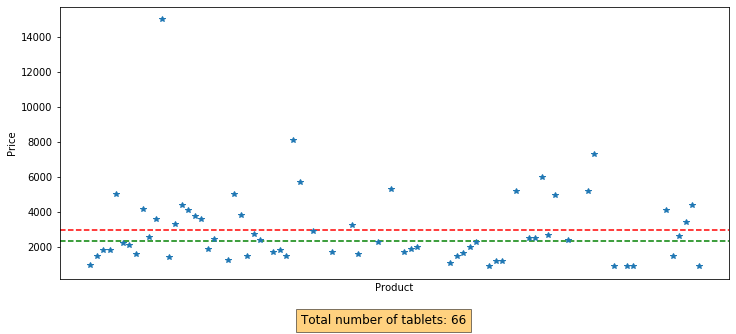

In [14]:
# HKTVMall
data_hktv = pd.read_csv('Products_HKTVMall.csv')

# Tablets
tablets_hktv = data_hktv[(data_hktv.product_type == 'tablet') & (data_hktv.product_price > 800) & (~data_hktv.product_name.str.contains('智能手機|智能筆|多功能底座', regex=True))]
#remove accesories

mean_hktv = tablets_hktv.product_price.mean()
median_hktv = tablets_hktv.product_price.median()

plt.figure(figsize=(12,5))
plt.xticks([])
plt.xlabel('Product')

plt.axhline(mean_hktv, color='r', label='Mean', linestyle='--')
plt.axhline(median_hktv, color='g', label='Median', linestyle='--')

plt.ylabel('Price')
plt.figtext(0.5, 0, 'Total number of tablets: ' + str(tablets_hktv.product_price.count()), ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.plot(tablets_hktv.product_price, '*')

plt.savefig('hktv-tablet-price.png')



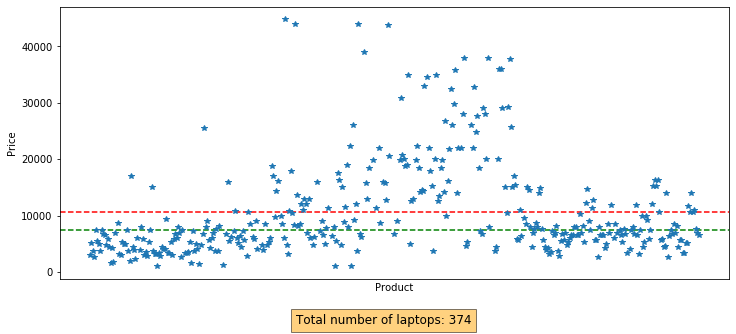

In [15]:
# Laptop
laptops_hktv = data_hktv[(data_hktv.product_type == 'laptop') & (data_hktv.product_price > 800) & (~data_hktv.product_name.str.contains('智能筆', regex=True))]
#remove accesories

mean_hktv = laptops_hktv.product_price.mean()
median_hktv = laptops_hktv.product_price.median()

plt.figure(figsize=(12,5))
plt.xticks([])
plt.xlabel('Product')

plt.axhline(mean_hktv, color='r', label='Mean', linestyle='--')
plt.axhline(median_hktv, color='g', label='Median', linestyle='--')

plt.ylabel('Price')
plt.figtext(0.5, 0, 'Total number of laptops: ' + str(laptops_hktv.product_price.count()), ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.plot(laptops_hktv.product_price, '*')

plt.savefig('hktv-laptop-price.png')

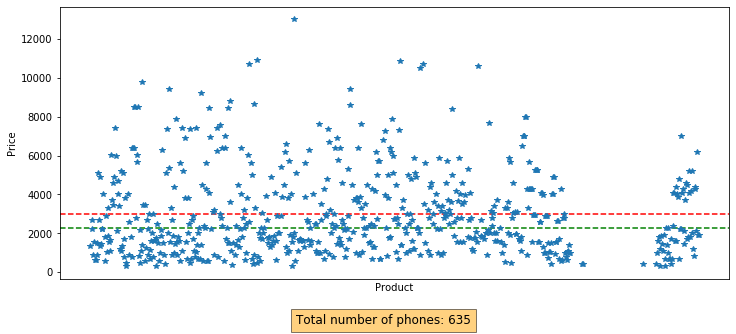

In [16]:
# Smartphones
phones_hktv = data_hktv[(data_hktv.product_type == 'smartphone') & (data_hktv.product_price > 298) & (~data_hktv.product_name.str.contains('更換|AirPods', regex=True))]
#remove accesories

mean_hktv = phones_hktv.product_price.mean()
median_hktv = phones_hktv.product_price.median()

plt.figure(figsize=(12,5))
plt.xticks([])
plt.xlabel('Product')

plt.axhline(mean_hktv, color='r', label='Mean', linestyle='--')
plt.axhline(median_hktv, color='g', label='Median', linestyle='--')

plt.ylabel('Price')
plt.figtext(0.5, 0, 'Total number of phones: ' + str(phones_hktv.product_price.count()), ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.plot(phones_hktv.product_price, '*')

plt.savefig('hktv-phone-price.png')


(1075, 9)


In [17]:
def concat_to_new_df(df1, df2, df3, file_name):
    list_frame = [df1, df2, df3]
    all_products_df = pd.concat(list_frame)
    all_products_df.index.name = "Index"
    all_products_df = all_products_df.astype({"product_index": str})
    all_products_df = all_products_df.drop(all_products_df.columns[0], axis=1)
    print(all_products_df.shape)
    all_products_df.to_csv(file_name, encoding="utf_8_sig")


In [18]:
concat_to_new_df(tablets_hktv, laptops_hktv, phones_hktv, "Filtered-HKTVMall-Products.csv")

(1075, 9)


## Suning Price Scatter

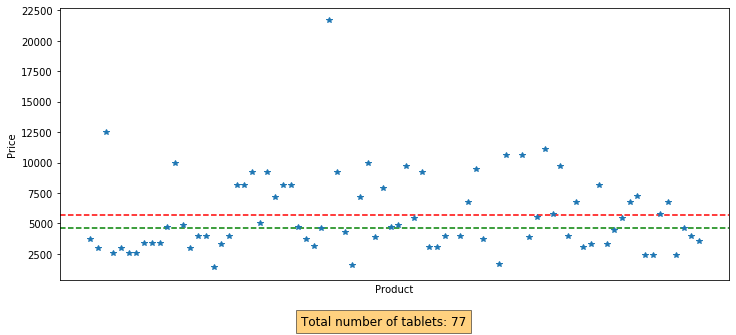

In [19]:
# Suning
data_suning = pd.read_csv('Products_Suning.csv')

# Tablets
tablets_suning = data_suning[(data_suning.product_type == 'Tablet') & (data_suning.price > 800) & (~data_suning.product_name.str.contains('智能手機|智能筆|多功能底座', regex=True))]
#remove accesories

mean_suning = tablets_suning.price.mean()
median_suning = tablets_suning.price.median()

plt.figure(figsize=(12,5))
plt.xticks([])
plt.xlabel('Product')

plt.axhline(mean_suning, color='r', label='Mean', linestyle='--')
plt.axhline(median_suning, color='g', label='Median', linestyle='--')

plt.ylabel('Price')
plt.figtext(0.5, 0, 'Total number of tablets: ' + str(tablets_suning.price.count()), ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.plot(tablets_suning.price, '*')

plt.savefig('suning-tablet-price.png')


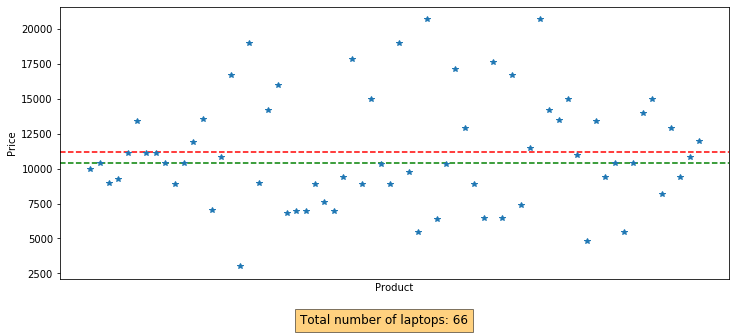

In [20]:
# Laptop
laptops_suning = data_suning[(data_suning.product_type == 'Laptop') & (data_suning.price > 800) & (~data_suning.product_name.str.contains('智能筆', regex=True))]
#remove accesories

mean_suning = laptops_suning.price.mean()
median_suning = laptops_suning.price.median()

plt.figure(figsize=(12,5))
plt.xticks([])
plt.xlabel('Product')

plt.axhline(mean_suning, color='r', label='Mean', linestyle='--')
plt.axhline(median_suning, color='g', label='Median', linestyle='--')

plt.ylabel('Price')
plt.figtext(0.5, 0, 'Total number of laptops: ' + str(laptops_suning.price.count()), ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.plot(laptops_suning.price, '*')

plt.savefig('suning-laptop-price.png')


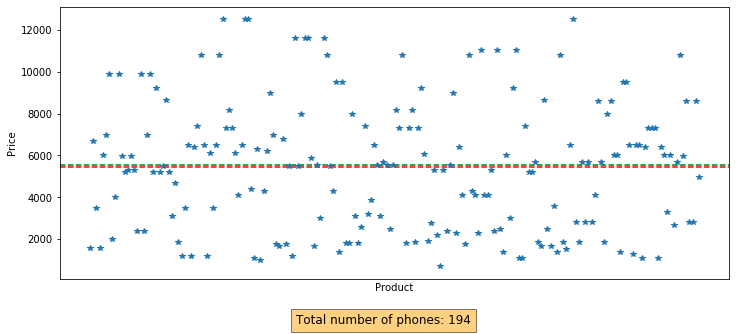

In [21]:
# Smartphones
phones_suning = data_suning[(data_suning.product_type == 'Mobile Phone') & (data_suning.price > 298) & (~data_suning.product_name.str.contains('更換|AirPods', regex=True))]
#remove accesories

mean_suning = phones_suning.price.mean()
median_suning = phones_suning.price.median()

plt.figure(figsize=(12,5))
plt.xticks([])
plt.xlabel('Product')

plt.axhline(mean_suning, color='r', label='Mean', linestyle='--')
plt.axhline(median_suning, color='g', label='Median', linestyle='--')

plt.ylabel('Price')
plt.figtext(0.5, 0, 'Total number of phones: ' + str(phones_suning.price.count()), ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.plot(phones_suning.price, '*')

plt.savefig('suning-smartphone-price.png')


In [22]:
concat_to_new_df(tablets_suning, laptops_suning, phones_suning, "Filtered-Suning-Products.csv")

(337, 9)


# Suning Volume of Transaction

In [ ]:
def plot_stats_data(stats_df, stats_owner: str) -> charts->Bar:
    product_names = stats_suning["product_name"].to_list()
    median = stats_suning["median_rates"].to_list()
    mean = stats_suning["mean_rates"].to_list()
    
    bar = (
        Bar()
        .add_xaxis(product_names)
        .add_yaxis("Median Rates", median)
        .add_yaxis("Mean Rates", mean)
    )

In [14]:
data_cust_suning = pd.read_csv('Customers_Suning.csv')
data_prod_suning = pd.read_csv('Updated-CSV/Filtered-Suning-Products.csv')
data_prod_suning = data_prod_suning.drop(data_prod_suning.columns[0], axis=1)
data_cust_hktv = pd.read_csv('Customers_HKTVMall.csv')
data_prod_hktv = pd.read_csv('Updated-CSV/Filtered-HKTVMall-Products.csv')
data_prod_hktv = data_prod_hktv.drop(data_prod_hktv.columns[0], axis=1)

In [15]:
data_prod_suning

,product_index,product_type,product_name,prodect_brand,price,avg_rating,total_comment,seller,website
0,10964124069,Tablet,APPLE IPAD AIR 10.5 64GB WIFI GOLD MUUL2ZP/A 平板電腦,APPLE,3699.0,0,216,香港蘇寧,https://product.hksuning.com/0000000000/109641...
1,10964145615,Tablet,APPLE IPAD MINI 2019 64GB WIFI SPACE GREY MUQW...,APPLE,2988.0,0,203,香港蘇寧,https://product.hksuning.com/0000000000/109641...
2,10555865475,Tablet,Apple iPad Pro 12.9 1TB Wi-Fi Space Gray MTFR2...,Apple,12499.0,0,5,香港蘇寧,https://product.hksuning.com/0000000000/105558...
3,11359867696,Tablet,Apple iPad 10.2 Wifi 32GB Space Gray MW742ZP/A...,Apple,2599.0,-1,0,香港蘇寧,https://product.hksuning.com/0000000000/113598...
4,10964145617,Tablet,APPLE IPAD MINI 2019 64GB WIFI SILVER MUQX2ZP/...,APPLE,2988.0,0,194,香港蘇寧,https://product.hksuning.com/0000000000/109641...
...,...,...,...,...,...,...,...,...,...
332,11356505293,Mobile Phone,APPLE IPHONE 11 PRO 64GB 手機 太空灰,APPLE,8599.0,-1,0,香港蘇寧,https://product.hksuning.com/0000000000/113565...
333,11039060815,Mobile Phone,SAMSUNG GALAXY A70 手機 8+128GB 黑色,SAMSUNG,2798.0,0,326,香港蘇寧,https://product.hksuning.com/0000000000/110390...
334,11039060816,Mobile Phone,SAMSUNG GALAXY A70 手機 8+128GB 藍色,SAMSUNG,2798.0,0,247,香港蘇寧,https://product.hksuning.com/0000000000/110390...
335,11356505297,Mobile Phone,APPLE IPHONE 11 PRO 64GB 手機 金色,APPLE,8599.0,-1,0,香港蘇寧,https://product.hksuning.com/0000000000/113565...


In [16]:
filtered = data_prod_suning.sort_values(['total_comment'], ascending=False)
filtered = filtered[filtered.total_comment > 0]
prod_index = filtered.product_index
# filtered[filtered.total_comment > 0].count()

In [17]:
customer_comments_records_suning = data_cust_suning['product_index'].value_counts()
# print(customer_comments_records_suning.head(15))

#Get all commented product from customer data

#get avg rates from customers
stats_suning_dict = {}
for i in customer_comments_records_suning.index:
    stats_suning_dict[i] = [
        data_cust_suning[data_cust_suning.product_index == i].user_rate.median(), 
        data_cust_suning[data_cust_suning.product_index == i].user_rate.mean()
    ]

stats_suning = pd.DataFrame(stats_suning_dict).T
stats_suning.columns = ['median_rates', 'mean_rates']
stats_suning = stats_suning.round({"median_rates": 2, "mean_rates": 2})

# stats["no_of_rates"] = np.nan
stats_suning.index.name = "Product Index"
# temp = prod_data[['product_index', 'no_of_rates']].set_index('product_index')

In [18]:
stats_suning = pd.merge(
    stats_suning, data_prod_suning,
    left_on = "Product Index",
    right_on = "product_index",
    how='outer'
)

In [19]:
stats_suning = stats_suning[["product_name", "product_index", "product_type", "median_rates", "mean_rates", "total_comment"]]
stats_suning = stats_suning.fillna(0)
stats_suning = stats_suning.astype({"product_index": str})

In [23]:
stats_suning.to_csv("Stats_Suning.csv", encoding="utf_8_sig")
stats_suning

,product_name,product_index,product_type,median_rates,mean_rates,total_comment
0,APPLE IPHONE XS 64GB 手機 金色,10584849206.0,Mobile Phone,5.0,5.0,472.0
1,HUAWEI MATE 20 X 手機 藍色,10674060101.0,Mobile Phone,5.0,5.0,505.0
2,APPLE IPHONE XR 128GB 手機 黑色,10584849457.0,Mobile Phone,5.0,5.0,510.0
3,APPLE IPHONE XS MAX 256GB 手機 金色,10584849382.0,Mobile Phone,5.0,5.0,509.0
4,Apple iPad Pro 11 256GB Wi-Fi Space Gray MTXQ2...,10555802003.0,Tablet,5.0,5.0,508.0
...,...,...,...,...,...,...
334,APPLE IPHONE 11 64GB 手機 白色,11356500069.0,Mobile Phone,0.0,0.0,0.0
335,APPLE IPHONE 11 64GB 手機 綠色,11356505266.0,Mobile Phone,0.0,0.0,0.0
336,HUAWEI P30 PRO 8+256GB 手機 薰衣草,11362693468.0,Mobile Phone,0.0,0.0,0.0
337,APPLE IPHONE 11 PRO 64GB 手機 太空灰,11356505293.0,Mobile Phone,0.0,0.0,0.0


In [24]:
customer_comments_records_hktv = data_cust_hktv['product_index'].value_counts()
# print(customer_comments_records_hktv.head(15))

#Get all commented product from customer data

#get avg rates from customers
stats_hktv_dict = {}
for i in customer_comments_records_hktv.index:
    stats_hktv_dict[i] = [
        data_cust_hktv[data_cust_hktv.product_index == i].user_rate.median(), 
        data_cust_hktv[data_cust_hktv.product_index == i].user_rate.mean()
    ]

stats_hktv = pd.DataFrame(stats_hktv_dict).T
stats_hktv.columns = ['median_rates', 'mean_rates']
stats_hktv = stats_hktv.round({"median_rates": 2, "mean_rates": 2})

# stats["no_of_rates"] = np.nan
stats_hktv.index.name = "Product Index"
# temp = prod_data[['product_index', 'no_of_rates']].set_index('product_index')

In [25]:
stats_hktv = pd.merge(
    stats_hktv, data_prod_hktv,
    left_on = "Product Index",
    right_on = "product_index",
    how='outer'
)

In [26]:
stats_hktv = stats_hktv[["product_name", "product_index", "product_type", "median_rates", "mean_rates", "total_comment"]]
stats_hktv = stats_hktv.fillna(0)

In [27]:
stats_hktv.to_csv("Stats_HKTVMall.csv", encoding="utf_8_sig")
stats_hktv

,product_name,product_index,product_type,median_rates,mean_rates
0,5.5吋 4G-LTE 智能電話 (4+64GB) X598 (黑色),H0972006_S_196,smartphone,1.5,2.70
1,超薄 notebook - F7 (6+128GB),H0972006_S_F7,tablet,3.5,3.10
2,空氣淨化器2s（平行進口）,H5912001_S_Xa0032,smartphone,4.0,4.20
3,4G-LTE 智能手機 - GALAXY S4 (黑色),H0972006_S_325,smartphone,2.5,2.90
4,0,0,0,5.0,3.67
...,...,...,...,...,...
1103,香港行貨(魅影黑)GALAXY A80 A8050 8GB RAM 128GB ROM,H7007001_S_SAMA8050H01BK01,smartphone,0.0,0.00
1104,Moto G5s Plus XT1805 智能手機 (灰) - Motorola,H0775002_S_G5P01GRY,smartphone,0.0,0.00
1105,ONE PLUS 7 Pro 12+256GB-黑（平行進口）,H5912001_S_OP0011,smartphone,0.0,0.00
1106,"iPhone 7 128GB 黑色, 二手9成新 (100%正常運作)(平行進口)(供應商9...",H0972006_S_iphone7bk,smartphone,0.0,0.00


## Suning Wordcloud

## HKTVMALL Wordcloud

In [100]:
# Convert to text file
hktv_comments_series = data_cust_hktv["buyer_comment"]
hktv_comments_df = pd.DataFrame(hktv_comments_series)
hktv_comments_df.index.name = "Index"
hktv_comments_df.to_csv("tmp_wordcloud.txt", header=None, index=None, sep=';', encoding="utf_8")

In [ ]:
stylecloud.gen_stylecloud(file_path='tmp_wordcloud.txt',
                          icon_name='fas fa-dog',
                          palette='colorbrewer.diverging.Spectral_11',
                          # background_color='black',
                          # gradient='horizontal'
                         )

['濾網沒有包裝袋，是兩腳插頭，其他幾好 No adaptor provided.  Late delivery half an hour. 準時發貨，包裝很好，連線容易，好靜說明書有多個語言，就係冇中文，插頭係兩圓腳，過濾器無包裝袋 Good 超值、抵用 從收到貨到現在連續長開4日，室內空氣質素好左，好靜冇雜音，可以用App監控系統方便~ 剛取貨，但打開背板即見慮芯，毋須拆袋，無插頭跟，無說明書，唔識怎連wifi. 準時送到，用左3分鐘，機著到冇壞 Work good as of now 運送快捷有禮', '跟機放火牛和線的位置是空的，欠了火牛和線，沒法使用用? 用作一般文書處理0k，價格實惠 價值合理 充電線冇反應！麻煩跟進 good quality,  thin, light and fast 剛買了但不能charge 電, 不知是 laptop 還是火牛的問題, 我應該如果處理? 我沒有類似的火牛測試 laptop.  好抵用，正！ 好用 開機之後不停閃，打去保養又話只得晚上19:30 : 20:00,完全無人理 按shift 2和3 变不到@和#, 是否壞了這兩個制', "輕巧，切備齊。 Very good product, on time delivery. I bought this phone three days ago.  I discovered that ths charger and adapter become very hot while I was charging the phone.  I wonder whether it would cause fire because my other Samsung phones does not have this phenomenon.  Winnie Chu Both two packages has been opened and resealed, I wonder whether they are brand new or not.I definitely won't buy any products from this supplier any more,  價錢很，工能好，低買 Just as expected. Came on time! 很失望！因為在TV mall 的

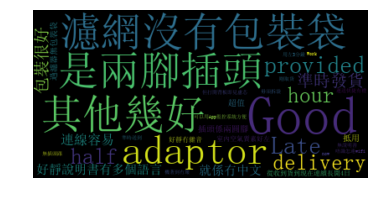

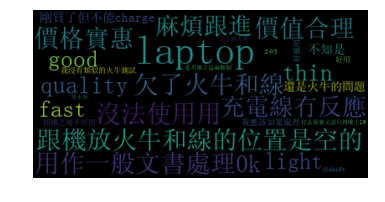

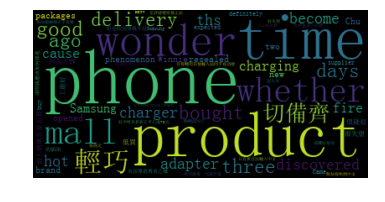

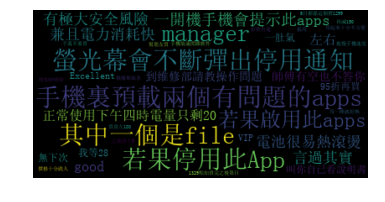

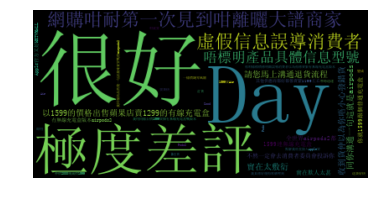

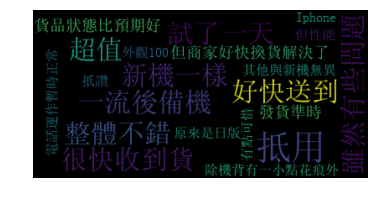

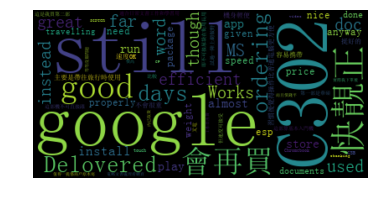

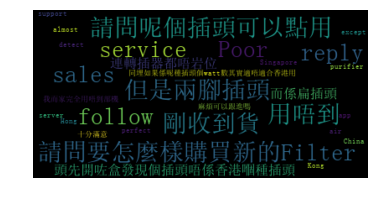

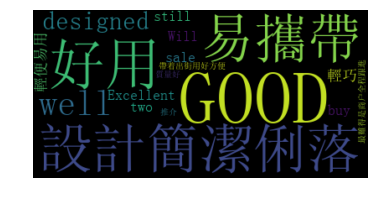

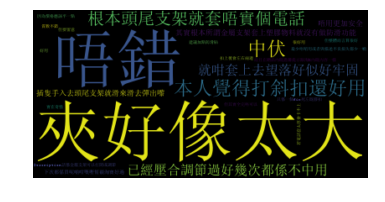

In [92]:
customer_comments_records = data_cust_hktv['product_index'].value_counts()
prod_index = customer_comments_records.head(10).index

#Get all commented product from customer data

#get avg rates from customers
stats_dict = {}
for i in customer_comments_records.index:
    stats_dict[i] = [cust_data[cust_data.product_index == i].user_rate.median(), cust_data[cust_data.product_index == i].user_rate.mean()]

stats = pd.DataFrame(stats_dict).T
stats.columns = ['median_rates', 'mean_rates']


all_groups = []
for i in prod_index:
    group = []
    temp = data_cust_hktv[data_cust_hktv.product_index == i]
    for j in temp.buyer_comment:
        group.append(j)
        str_group = ' '.join(group)
    all_groups.append(str_group)
print(all_groups)
    
index = 0
for text in all_groups:
    wordcloud = WordCloud(font_path="simsun.ttf").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file(f"hktvmall-commentop10-wordcloud/hktv-item{index}.png")
    index += 1

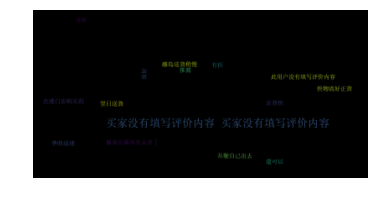

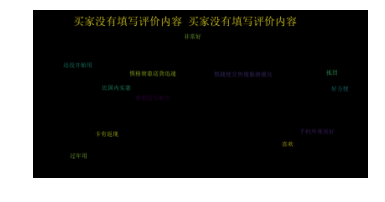

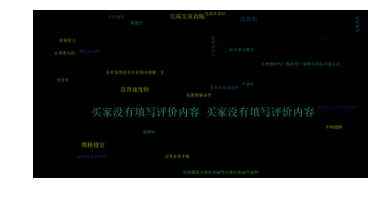

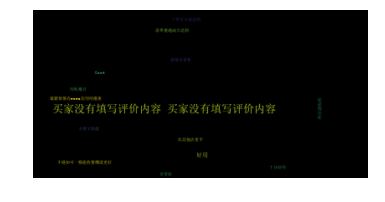

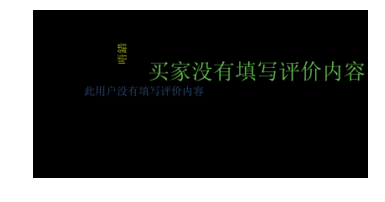

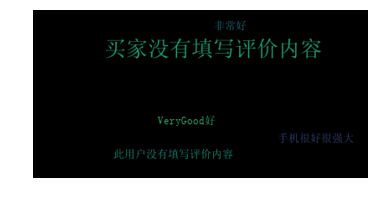

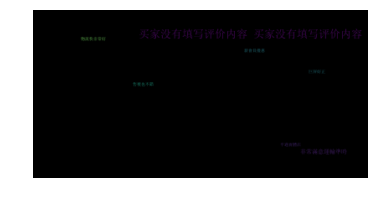

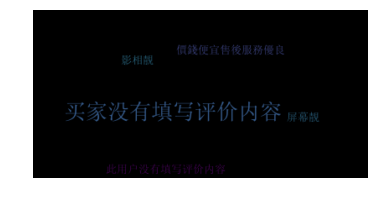

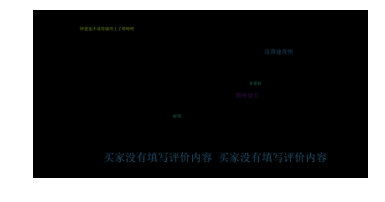

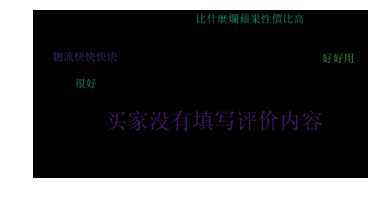

In [100]:
customer_comments_records = data_prod_suning.sort_values(['total_comment'], ascending=False)
prod_index = customer_comments_records.head(10).product_index

#Get all commented product from customer data

#get avg rates from customers
# stats_dict = {}
# for i in customer_comments_records.index:
#     stats_dict[i] = [cust_data[cust_data.product_index == i].user_rate.median(), cust_data[cust_data.product_index == i].user_rate.mean()]

# stats = pd.DataFrame(stats_dict).T
# stats.columns = ['median_rates', 'mean_rates']


all_groups = []
for i in prod_index:
    group = []
    temp = data_cust_suning[data_cust_suning.product_index == i]
    for j in temp.buyer_comment:
        group.append(j)
    str_group = ' '.join(group)
    all_groups.append(str_group)
    
index = 0
for text in all_groups:
    wordcloud = WordCloud(font_path="simsun.ttf").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file(f"suning-commentop10-wordcloud/hktv-item{index}.png")
    index += 1

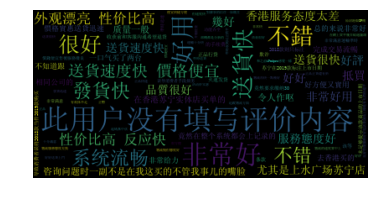

In [112]:
group = []
for i in data_cust_suning[~data_cust_suning.buyer_comment.str.contains('买家没有填写评价内容！', regex=True)].buyer_comment:
    group.append(i)
text = ' '.join(group)

wordcloud = WordCloud(font_path="simsun.ttf").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud-suning-overall.png")

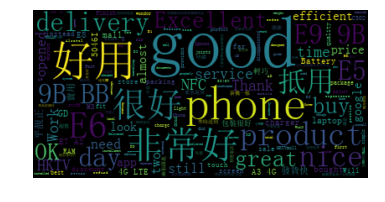

In [113]:
group = []
for i in data_cust_hktv.buyer_comment:
    group.append(i)
text = ' '.join(group)

wordcloud = WordCloud(font_path="simsun.ttf").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud-hktv-overall.png")

# Grouping Items by Name 

## Grouping Algorithm

- Cosine similarity

In [4]:
import textdistance
import re


regex_filter = '[\(\-\)（）\[\]—\/]|香港行貨|平行進口|水貨'

threshold = 0.8
def group_by_text_similarity(item_name = []):
    all_matches = []
    while len(item_name) > 0:
        match = []
        match.append(item_name[0])
        temp = re.sub(regex_filter, ' ', item_name[0])
        item_name.pop(0)
        i = 0
        while len (item_name) > 0:
            if i == len(item_name):
                break
            processed_str = re.sub(regex_filter, ' ', item_name[i])
            if textdistance.cosine(processed_str , temp) > threshold:
                match.append(item_name[i])
                item_name.pop(i)
            else:
                i+=1
        all_matches.append(match)
    return all_matches

#### Plot grouping finction

In [23]:
def plot_grouping_bar_chart(grouping_list: list, group_name: str) -> charts.Bar:
    bar = (
        charts.Bar(init_opts=opts.InitOpts(theme=ThemeType.WALDEN))
        .add_xaxis(["smartphone", "tablet", "laptop"])
        .add_yaxis("Product Count", grouping_list)
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title=f"Product Count of {group_name}", 
            )
        )
    )
    make_snapshot(
        snapshot, 
        bar.render(), 
        f"Pictures/{group_name}-grouping-count.png"
    )
    return bar
    

In [297]:
def plot_grouping_pie_chart(grouping_list: list, group_name: str):
    fig, ax = plt.subplots()
    plt.figure(figsize=(15, 10))
    color_palette_list = ['#3D5AFE', '#7986CB', '#7E57C2', '#C1F0F6', '#0099CC']
    plt.rcParams['text.color'] = '#424242'
    plt.rcParams['axes.labelcolor']= '#909090'
    plt.rcParams['xtick.color'] = '#909090'
    plt.rcParams['ytick.color'] = '#909090'
    plt.rcParams['font.size'] = 12
    labels = ["smartphone", "tablet", "laptop"]
    
    percentages = []
    sum = 0
    for i in grouping_list:
        sum += i
    for g in grouping_list:
        percentages.append(g/sum)
        
    explode=(0.1, 0, 0.1)
    
    ax.pie(percentages, explode=explode, labels=labels,  
           colors=color_palette_list[0:3], autopct='%1.0f%%', 
           shadow=False, startangle=0,   
           pctdistance=1.13, labeldistance=1.25)
    ax.axis('equal')
#     ax.title(f"{group_name} Percentage of Each Category", loc='right', fontsize=20)
#     ax.set_title(f"{group_name} Percentage of Each Category", loc='right')
    ax.legend(frameon=False, bbox_to_anchor=(1.5, 0.8))
    
    plt.savefig(f'Pictures/{group_name}-grouping-percentage.png')

### HKTVMall Grouping

In [6]:
hktv_data = pd.read_csv('Products_HKTVMall.csv')
hktv_category_list = []

# ----------

hktv_smartphone_filtered = hktv_data[
    (hktv_data.product_type == 'smartphone') & 
    (hktv_data.product_price > 298) & 
    (~hktv_data.product_name.str.contains('更換|AirPods', regex=True))
].product_name.values.tolist()

hktv_phone_matches = group_by_text_similarity(hktv_smartphone_filtered)

hktv_phone_index = 0
for i in hktv_phone_matches:
    if len(i) > 1:
        hktv_phone_index += 1
hktv_category_list.append(hktv_phone_index)
print(f"HKTVMall Smartphone Total Groupings: {hktv_phone_index}")

# ----------

hktv_tablet_filtered = hktv_data[
    (hktv_data.product_type == 'tablet') & 
    (hktv_data.product_price > 0) & 
    (~hktv_data.product_name.str.contains('智能手機|智能筆|多功能底座', regex=True))
].product_name.values.tolist()

hktv_tablet_matches = group_by_text_similarity(hktv_tablet_filtered)

hktv_tablet_index = 0
for i in hktv_tablet_matches:
    if len(i) > 1:
        hktv_tablet_index += 1
hktv_category_list.append(hktv_tablet_index)
print(f"HKTVMall Tablet Total Groupings: {hktv_tablet_index}")

# ----------

hktv_laptop_filtered = hktv_data[
    (hktv_data.product_type == 'laptop') & 
    (hktv_data.product_price > 0) & 
    (~hktv_data.product_name.str.contains('智能筆', regex=True))
].product_name.values.tolist()
hktv_laptop_matches = group_by_text_similarity(hktv_laptop_filtered)

hktv_laptop_index = 0
for i in hktv_laptop_matches:
    if len(i) > 1:
        hktv_laptop_index+=1
hktv_category_list.append(hktv_laptop_index)   
print(f"HKTVMall Laptop Total Groupings: {hktv_laptop_index}")

HKTVMall Smartphone Total Groupings: 126
HKTVMall Tablet Total Groupings: 17
HKTVMall Laptop Total Groupings: 88


In [24]:
hktv_bar = plot_grouping_bar_chart(hktv_category_list, "HKTVMall")
hktv_bar.load_javascript()
hktv_bar.render_notebook()

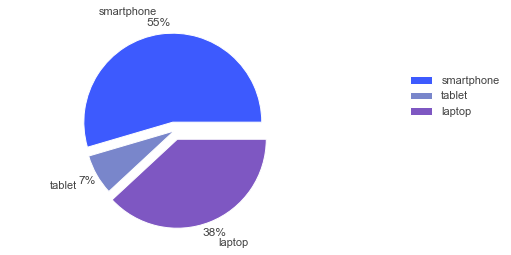

<Figure size 1080x720 with 0 Axes>

In [300]:
plot_grouping_pie_chart(hktv_category_list, "HKTVMall")

### Suning Grouping

In [30]:
suning_data = pd.read_csv('Products_Suning.csv')
suning_category_list = []

# ----------

suning_smartphone_filtered = suning_data[
    (suning_data.product_type == 'Mobile Phone') & 
    (suning_data.price > 298) & 
    (~suning_data.product_name.str.contains('更換|AirPods', regex=True))
].product_name.values.tolist()

suning_smartphone_matches = group_by_text_similarity(suning_smartphone_filtered)

suning_smartphone_index = 0
for i in suning_smartphone_matches:
    if len(i) > 1:
        suning_smartphone_index += 1
suning_category_list.append(suning_smartphone_index)          
print(f"Suning Smartphone Total Groupings: {suning_smartphone_index}")

# ----------

suning_tablet_filtered = suning_data[
    (suning_data.product_type == 'Tablet') & 
    (suning_data.price > 0) & 
    (~suning_data.product_name.str.contains('智能手機|智能筆|多功能底座', regex=True))
].product_name.values.tolist()

suning_tablet_matches = group_by_text_similarity(suning_tablet_filtered)

suning_tablet_index = 0
for i in suning_tablet_matches:
    if len(i) > 1:
        suning_tablet_index += 1
suning_category_list.append(suning_tablet_index)  
print(f"Suning Tablet Total Groupings: {suning_tablet_index}")

# ----------

suning_laptop_filtered = suning_data[
    (suning_data.product_type == 'Laptop') & 
    (suning_data.price > 0) & 
    (~suning_data.product_name.str.contains('智能筆', regex=True))
].product_name.values.tolist()

suning_laptop_matches = group_by_text_similarity(suning_laptop_filtered)

suning_laptop_index = 0
for i in suning_laptop_matches:
    if len(i) > 1:
        suning_laptop_index += 1
suning_category_list.append(suning_laptop_index)          
print(f"Suning Laptop Total Groupings: {suning_laptop_index}")

Suning Smartphone Total Groupings: 28
Suning Tablet Total Groupings: 10
Suning Laptop Total Groupings: 11


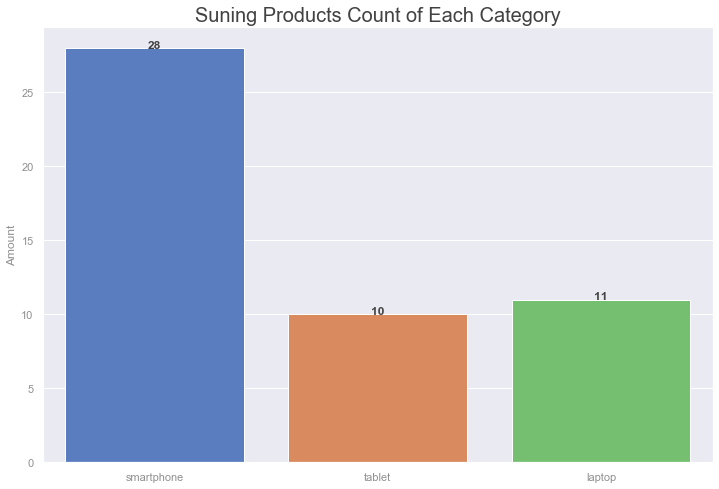

In [301]:
plot_grouping_bar_chart(suning_category_list, "Suning")

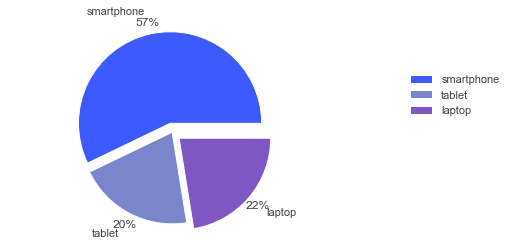

<Figure size 1080x720 with 0 Axes>

In [302]:
plot_grouping_pie_chart(suning_category_list, "Suning")